In [1]:
# Importer biblioteker som trengs
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# Importerer datasettet
df = pd.read_csv('datasett.csv')

In [3]:
# Tar en titt på dataen
df.head()

,documentDate,picturedate,lastchanged,adcreated,price,listprice,lat,lng,address,apartmentnumber,...,F_Turterreng,adtitle,N_modernisering,N_oppussing,N_regulert,N_garasjemulighet,postcode,Parking,price_inc_debt,area_id
0,2020-09-25,2020/7,2020-08-07,2020-08-03,5150000,4650000.0,59.913030,10.776672,"Hagegata 41, 0653 Oslo",H0703,...,NaN,VISNING AVLYST! Direkte bud til selger. Topple...,False,False,False,False,653,1,5150000.0,1
1,2020-09-29,2020/8,2020-12-14,2020-08-25,3900000,3650000.0,59.918900,10.647900,"Skogbrynet 16D, 0283 Oslo",U0101,...,1.0,Innbydende og lys 2-roms hjørneleilighet - Ves...,False,False,False,False,283,1,3944838.0,6
2,2021-12-02,2021/8,2021-08-01,2021-07-27,9900000,8750000.0,59.879000,10.799300,"Ringshusveien 8B, 1176 Oslo",H0101,...,1.0,Oppussingsobjekt - Enebolig i kjede med skjerm...,False,True,False,False,1176,1,9900000.0,14
3,2009-11-12,4/186,2009-09-05,2009-08-24,1660000,1680000.0,59.887690,10.802634,"Libakkfaret 1 A, 1184 Oslo",H0302,...,NaN,BRATTLIKOLLEN - Lys og gjennomgående 3-roms se...,False,False,False,False,1184,0,1678207.0,14
4,2012-10-24,2012/6,2012-06-15,2012-06-01,5760000,5490000.0,59.944653,10.888134,"Micheletveien 20, 1053 Oslo",U0102,...,NaN,GAMLE FURUSET - Velholdt og romslig enebolig m...,False,False,False,False,1053,0,5760000.0,12


In [4]:
# Printer litt info om datasettet
print(f"Antall rader i datasettet: {len(df)}")
print(f"Antall kolonner i datasettet: {len(df.columns)}")
print()
print(df.columns)

Antall rader i datasettet: 181250
Antall kolonner i datasettet: 57

Index(['documentDate', 'picturedate', 'lastchanged', 'adcreated', 'price',
       'listprice', 'lat', 'lng', 'address', 'apartmentnumber',
       'apartmenttype', 'conveyancetype', 'finncode', 'BRA', 'PROM',
       'buildyear', 'matrikkel', 'bedrooms', 'rooms', 'bathrooms', 'WC',
       'elevator', 'floor', 'housingtype', 'commondebt', 'commoncosts',
       'F_Aircondition', 'F_Alarm', 'F_BalkongTerrasse', 'F_Barnevennlig',
       'F_Bredbåndstilknytning', 'F_Fellesvaskeri', 'F_GarasjeP-plass',
       'F_Heis', 'F_Ingen gjenboere', 'F_Lademulighet', 'F_Livsløpsstandard',
       'F_Moderne', 'F_Offentlig vannkloakk', 'F_Parkett', 'F_PeisIldsted',
       'F_Rolig', 'F_Sentralt', 'F_Utsikt', 'F_Vaktmester-vektertjeneste',
       'F_Bademulighet', 'F_Fiskemulighet', 'F_Turterreng', 'adtitle',
       'N_modernisering', 'N_oppussing', 'N_regulert', 'N_garasjemulighet',
       'postcode', 'Parking', 'price_inc_debt', 'area_id

In [5]:
#df.info()
#df.describe()

In [6]:
# Sjekker null-verdier
df.isnull().sum()

documentDate                        0
picturedate                       257
lastchanged                         0
adcreated                           0
price                               0
listprice                           0
lat                              1568
lng                              1568
address                             0
apartmentnumber                   822
apartmenttype                     792
conveyancetype                      0
finncode                            0
BRA                              3273
PROM                                0
buildyear                         925
matrikkel                           0
bedrooms                         9385
rooms                           51910
bathrooms                           0
WC                                  0
elevator                          792
floor                           37977
housingtype                         0
commondebt                      58689
commoncosts                     15759
F_Airconditi

Som vi kan se så finnes det null-verdier for flere av variablene. Dette er helt vanlig i større datasett og er et problem vi må gjøre noe med. Alle null-verdiene for variabler som starter med F_ (fasteliteter), vil bli kodet om til 0, da dette er dummy-variabler med 0 og 1 som verdi. Videre ser vi at rom og etasje er de to variablene med flest null-verdier (henholdsvis 51910 og 37977). Det finnes også et høyt antall null-verider for fellesgjeld og felleskostnader, men dette er knyttet til eneboliger og rekkehus hvor man ikke har disse kostnadene.

Det første vi skal gjøre er å gå gjennom variablene for å få en oversikt over hvordan dataen er og hvilke variabler vi må gjøre noe med. Vi starter med lengde og breddegrad (lat,lng).

                 lat            lng
count  179682.000000  179682.000000
mean       59.921185      10.777217
std         0.166531       0.132330
min        10.684200       5.372300
25%        59.912300      10.740151
50%        59.925990      10.773260
75%        59.938960      10.814118
max        60.360400      59.947437


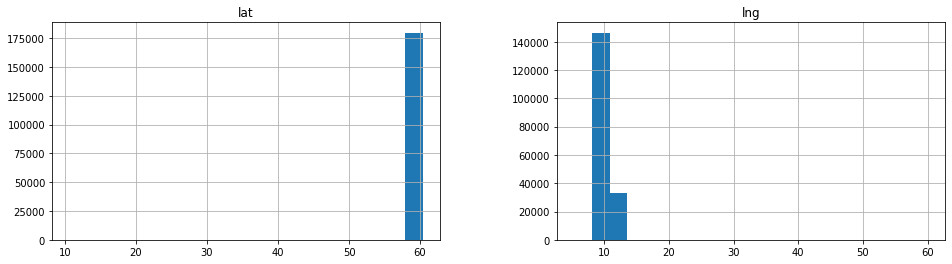

In [7]:
#Printer litt info om lat/lng variablene, samt histogram.
print(df[["lat","lng"]].describe())
df[['lat',"lng"]].hist(bins=20,figsize=(16,4))
plt.show()

In [8]:
#Printer alle variabler med 8 < lng < 12
print(df.loc[df['lng']>=12, ['lng','lat']])
print(df.loc[df['lng']<=8, ['lng','lat']])

             lng        lat
26325  59.947437  10.785965
          lng      lat
56426  5.3723  60.3604


In [9]:
#Printer alle variabler med 58 < lat < 62
print(df.loc[df['lat']>=62, ['lng','lat']])
print(df.loc[df['lat']<=58, ['lng','lat']])

Empty DataFrame
Columns: [lng, lat]
Index: []
              lng        lat
26325   59.947437  10.785965
141115  10.684200  10.684200


Som vi kan se så er det et datapunkt som har mikset lengde og breddegrad, et datapunkt med mikset lengdegrad og feil breddegrad (5), samt et datapunkt hvor man har skrevet lengdegraden på både lat og lng. Det ene datapunktet kan vi bytte lat/lng, mens de andre datapunktetne må vi (...)

In [10]:
#Oppretter midlertidlig variabel for lat/lng og bytter med tidligere variabel 
lng = df.loc[26325]['lat']
lat = df.loc[26325]['lng']
df.loc[26325, 'lng'] = lng
df.loc[26325, 'lat'] = lat


In [11]:
#Fjerner datapunktene med feil i koordinater
df.drop(141115, inplace = True)
df.drop(56426, inplace = True)

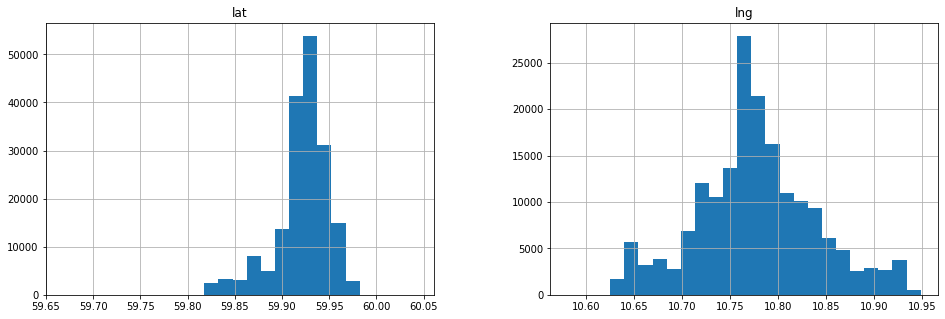

In [21]:
df[['lat','lng']].hist(figsize=(16,5), bins=25)
plt.show()

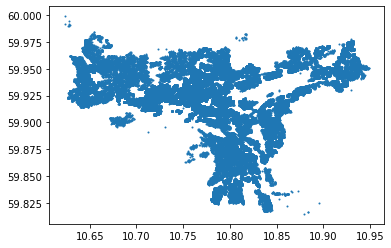

In [23]:
plt.scatter(df_latlng["lng"],df_latlng["lat"], s=1)
plt.show()

In [13]:
df_latlng = df.copy()

In [14]:
df_latlng.drop(df[df["lat"] < 59.8].index, inplace=True)
df_latlng.drop(df[df["lat"] > 60].index, inplace=True)

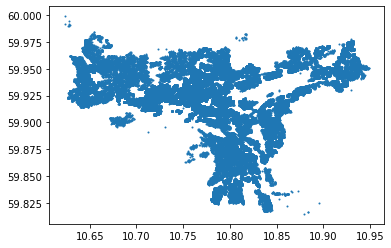

In [15]:
plt.scatter(df_latlng["lng"],df_latlng["lat"], s=1)
plt.show()

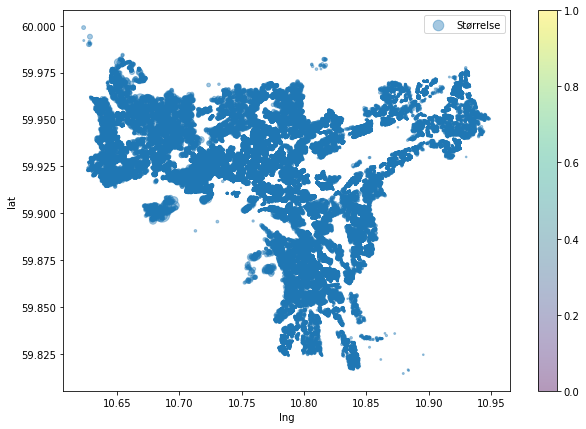

In [16]:
df_latlng.plot(kind = "scatter", 
                x = "lng", 
                y = "lat", 
                alpha = 0.4,                        # blending value, between 0 (transparent) and 1 (opaque).
                s = df_latlng["price"]/1000000,   # The marker size according to population
                label = "Størrelse",               # The label of the timeseries used in legend  
                figsize = (10,7),                   # Figure size
                #c = "price",           # color dependent on feature house value
                cmap = plt.get_cmap("jet"),         # color map in case that c is an array of floats
                colorbar = True,
                sharex = False)                     #  each subplot x- or y-axis will be independent  

plt.legend()
plt.show()


# Try to put an error into cmap then you get a suggestion of all the possibilities


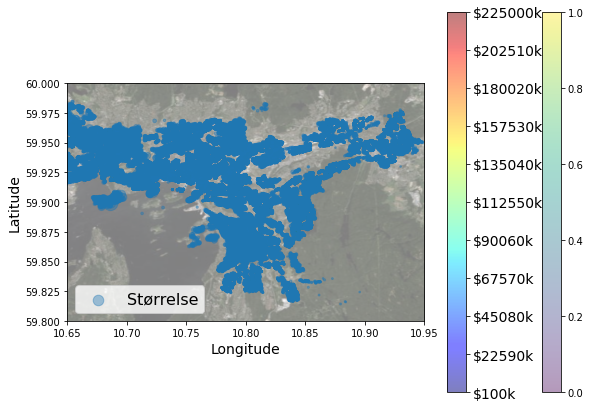

In [17]:
oslo_img=mpimg.imread('oslo.png')

ax = df_latlng.plot(kind = "scatter", 
                x = "lng", 
                y = "lat", 
                alpha = 0.4,                        # blending value, between 0 (transparent) and 1 (opaque).
                s = df_latlng["price"]/1000000,   # The marker size according to population
                label = "Størrelse",               # The label of the timeseries used in legend  
                figsize = (10,7),                   # Figure size
                #c = "price",           # color dependent on feature house value
                cmap = plt.get_cmap("jet"),         # color map in case that c is an array of floats
                colorbar = True,
                sharex = False)  

plt.imshow(oslo_img,
           extent=[10.65, 10.95, 59.8, 60],
           alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df_latlng["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
#cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [18]:
df.head()

,documentDate,picturedate,lastchanged,adcreated,price,listprice,lat,lng,address,apartmentnumber,...,F_Turterreng,adtitle,N_modernisering,N_oppussing,N_regulert,N_garasjemulighet,postcode,Parking,price_inc_debt,area_id
0,2020-09-25,2020/7,2020-08-07,2020-08-03,5150000,4650000.0,59.913030,10.776672,"Hagegata 41, 0653 Oslo",H0703,...,NaN,VISNING AVLYST! Direkte bud til selger. Topple...,False,False,False,False,653,1,5150000.0,1
1,2020-09-29,2020/8,2020-12-14,2020-08-25,3900000,3650000.0,59.918900,10.647900,"Skogbrynet 16D, 0283 Oslo",U0101,...,1.0,Innbydende og lys 2-roms hjørneleilighet - Ves...,False,False,False,False,283,1,3944838.0,6
2,2021-12-02,2021/8,2021-08-01,2021-07-27,9900000,8750000.0,59.879000,10.799300,"Ringshusveien 8B, 1176 Oslo",H0101,...,1.0,Oppussingsobjekt - Enebolig i kjede med skjerm...,False,True,False,False,1176,1,9900000.0,14
3,2009-11-12,4/186,2009-09-05,2009-08-24,1660000,1680000.0,59.887690,10.802634,"Libakkfaret 1 A, 1184 Oslo",H0302,...,NaN,BRATTLIKOLLEN - Lys og gjennomgående 3-roms se...,False,False,False,False,1184,0,1678207.0,14
4,2012-10-24,2012/6,2012-06-15,2012-06-01,5760000,5490000.0,59.944653,10.888134,"Micheletveien 20, 1053 Oslo",U0102,...,NaN,GAMLE FURUSET - Velholdt og romslig enebolig m...,False,False,False,False,1053,0,5760000.0,12


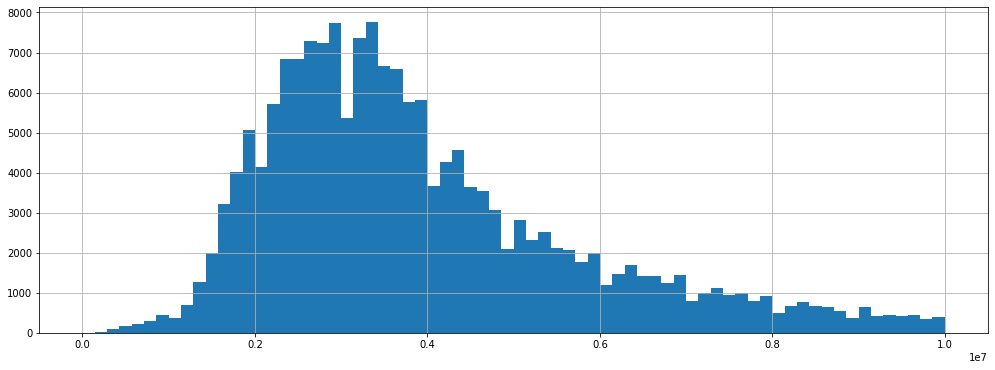

In [19]:
df['price'].hist(bins=70, range=[0,10000000], figsize=(17,6))
plt.show()

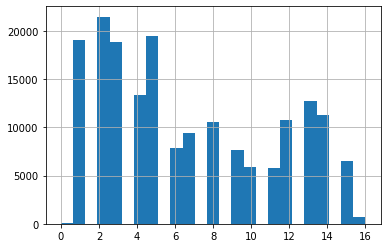

In [20]:
df["area_id"].hist(bins=25)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7a076037-bdbc-4d12-92b5-75ebface7fab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>